# Summary

Strategies with strong results:
  - Strategy 4: Rank-Threshold Simple One-Period (4h) Reversal Signal
  - Strategy 8: Use Raw One-Period (4h) Reversal Signal (Don't Rank But Do Demean-Normalize)
  - Strategy 9: Multiple-Period Reversal Signal Traded Every Period
  - Strategy 10: Winsorize Un-ranked Demean-Normalized Reversal Signal -- winsorize top and bottom 2%, top and bottom 5%

Strategies with okay results:
  - Strategy 6: One-Period (4h) Reversal Signal Traded Less Frequently Than One Period -- use 8h frequency
  - Strategy 7: Multiple-Period Reversal Signal Traded Less Frequently Than One Period -- use 8h frequency, use 12h frequency offset by 8h, 24h frequency
  - Strategy 10: Winsorize Un-ranked Demean-Normalized Reversal Signal -- winsorize top and bottom 10%

All strategies:
  - Strategy 1: Simple One-Period (4h) Reversal Signal
  - Strategy 2: Winsorize Simple One-Period (4h) Reversal Signal
  - Strategy 3: Truncate Simple One-Period (4h) Reversal Signal¶
  - Strategy 4: Rank-Threshold Simple One-Period (4h) Reversal Signal
  - Strategy 5: Inverse CDF Of Simple One-Period (4h) Reversal Signal: Rank, Inverse CDF Then Demean-Normalize
  - Strategy 6: One-Period (4h) Reversal Signal Traded Less Frequently Than One Period
  - Strategy 7: Multiple-Period Reversal Signal Traded Less Frequently Than One Period
  - Strategy 8: Use Raw One-Period (4h) Reversal Signal (Don't Rank But Do Demean-Normalize)
  - Strategy 9: Multiple-Period Reversal Signal Traded Every Period
  - Strategy 10: Winsorize Un-ranked Demean-Normalized Reversal Signal
  - Strategy 11: Truncate Un-ranked Demean-Normalized Reversal Signal
  - Strategy 12: Rank-Threshold Un-ranked Demean-Normalized Reversal Signal
  - Strategy 13: Inverse CDF Of Un-ranked Reversal Signal, Then Demean-Normalize
  - Strategy 14: Inverse CDF Of Un-ranked Reversal Signal, Then Rank-Demean-Normalize
  - Strategy 15: Multiple-Period Momentum Signal Traded Less Frequently Than One Period
  - Strategy 16: Use Rolling Average Of Simple One-Period (4h) Reversal Signal
  - Strategy 17: Use Exponential Decay Of Simple One-Period (4h) Reversal Signal
  - Strategy 18: Basic Correlation Strategy, One Period Behind

# Get Historical Data For Cryptocurrencies

In [2]:
from binance.client import Client as bnb_client
from datetime import datetime
import pandas as pd

# The universe is based on this snapshot from December 20, 2020: https://coinmarketcap.com/historical/20201220/

univ = [
    "BTCUSDT", "ETHUSDT", "ADAUSDT", "BNBUSDT", "XRPUSDT", "DOTUSDT", "MATICUSDT", "LTCUSDT", "BCHUSDT",
    "LINKUSDT", "XLMUSDT", "USDCUSDT", "EOSUSDT", "TRXUSDT", "XTZUSDT", "FILUSDT", "NEOUSDT", "DAIUSDT",
    "DASHUSDT", "VETUSDT", "ATOMUSDT", "AAVEUSDT", "UNIUSDT", "GRTUSDT", "THETAUSDT", "IOTAUSDT", "BUSDUSDT",
    "ZECUSDT", "YFIUSDT", "ETCUSDT", "WAVESUSDT", "COMPUSDT", "SNXUSDT", "DOGEUSDT", "MKRUSDT", "ZILUSDT",
    "SUSHIUSDT", "KSMUSDT", "OMGUSDT", "ONTUSDT", "ALGOUSDT", "EGLDUSDT", "BATUSDT", "DGBUSDT", "ZRXUSDT",
    "TUSDUSDT", "QTUMUSDT", "ICXUSDT", "AVAXUSDT", "RENUSDT", "HBARUSDT", "NEARUSDT", "LRCUSDT", "CELOUSDT",
    "KNCUSDT", "LSKUSDT", "OCEANUSDT", "QNTUSDT", "USTUSDT", "BANDUSDT", "MANAUSDT", "ENJUSDT", "ANTUSDT",
    "BNTUSDT", "ZENUSDT", "NMRUSDT", "RVNUSDT", "IOSTUSDT", "OXTUSDT", "CRVUSDT", "MATICUSDT", "HNTUSDT",
    "BALUSDT", "CHZUSDT"
]

should_download_stock_data = False

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
client = bnb_client(tld='US')


def get_binance_px(symbol, freq, start_ts = '2020-12-20'):
    data = client.get_historical_klines(symbol, freq, start_ts)
    columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_volume',
               'num_trades', 'taker_base_volume', 'taker_quote_volume', 'ignore']
    data = pd.DataFrame(data, columns = columns)
    
    # Convert from POSIX timestamp (number of millisecond since jan 1, 1970)
    data['open_time'] = data['open_time'].map(lambda x: datetime.utcfromtimestamp(x/1000))
    data['close_time'] = data['close_time'].map(lambda x: datetime.utcfromtimestamp(x/1000))
    return data 


if should_download_stock_data:
    freq = '4h'
    px = {}
    for x in univ:
        print(f"Downloading data for symbol {x}")
        data = get_binance_px(x, freq)
        px[x] = data.set_index('open_time')['close']

    px = pd.DataFrame(px).astype(float)
    px.to_csv('./class_project_input_prices.csv')
else:
    px = pd.read_csv('./class_project_input_prices.csv')
    date_format = "%Y-%m-%d %H:%M:%S"
    px['open_time'] = px['open_time'].apply(lambda t:  datetime.strptime(t, date_format))
    px.set_index('open_time', inplace=True)

# Data up to 2025-08-31 08:00:00
px

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,LTCUSDT,BCHUSDT,LINKUSDT,...,BNTUSDT,ZENUSDT,NMRUSDT,RVNUSDT,IOSTUSDT,OXTUSDT,CRVUSDT,HNTUSDT,BALUSDT,CHZUSDT
open_time,,,,,,,,,,,,,,,,,,,,,
2020-12-20 00:00:00,23353.97,646.62,0.16284,32.9681,0.56944,NaN,NaN,117.34,313.46,NaN,...,NaN,12.056,NaN,NaN,NaN,0.2492,NaN,1.41095,NaN,NaN
2020-12-20 04:00:00,23604.24,655.23,0.16638,33.6559,0.57916,NaN,NaN,121.30,340.00,NaN,...,NaN,12.107,NaN,NaN,NaN,0.2477,NaN,1.43156,NaN,NaN
2020-12-20 08:00:00,23549.50,652.88,0.16463,34.8228,0.57948,NaN,NaN,118.09,349.70,NaN,...,NaN,12.237,NaN,NaN,NaN,0.2477,NaN,1.44273,NaN,NaN
2020-12-20 12:00:00,23880.85,653.24,0.16542,35.0120,0.57798,NaN,NaN,119.10,361.21,NaN,...,NaN,12.074,NaN,NaN,NaN,0.2533,NaN,1.47130,NaN,NaN
2020-12-20 16:00:00,23932.71,649.82,0.16502,34.7042,0.57306,NaN,NaN,116.60,357.09,NaN,...,NaN,12.008,NaN,NaN,NaN,0.2503,NaN,1.43083,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-30 16:00:00,108921.64,4352.10,0.81950,856.7600,2.80720,3.816,NaN,110.23,542.00,23.36,...,0.725,7.240,16.62,0.01323,0.00342,0.0535,0.7646,NaN,NaN,0.03830
2025-08-30 20:00:00,108569.75,4374.56,0.82170,862.6200,2.81940,3.773,NaN,110.77,552.90,23.47,...,0.725,7.240,15.16,0.01323,0.00342,0.0535,0.7646,NaN,NaN,0.03830
2025-08-31 00:00:00,109155.73,4486.79,0.83590,863.4900,2.85180,3.867,NaN,111.67,551.30,23.90,...,0.764,7.240,15.21,0.01353,0.00342,0.0535,0.7936,NaN,NaN,0.04045


In [4]:
import numpy as np
import statsmodels.api as sm

from datetime import timedelta
from scipy.stats.mstats import winsorize
from scipy.stats import norm


bitcoin_benchmark_returns = px['BTCUSDT'] / px['BTCUSDT'].shift() - 1


def get_rank_demeaned_normalized_signal(raw_signal):
    signal_rank = raw_signal.rank(axis=1)
    signal_mean = raw_signal.rank(axis=1).mean(axis=1)
    demeaned_signal = signal_rank.subtract(signal_mean, axis=0)
    return demeaned_signal.divide(demeaned_signal.abs().sum(axis=1), axis=0)


def get_gross_returns_and_net_returns(signal_weights, px):
    asset_returns = px / px.shift() - 1
    weighted_returns = signal_weights.shift() * asset_returns
    gross_returns = weighted_returns.sum(axis=1)
    turnover = (signal_weights.fillna(0) - signal_weights.shift().fillna(0)).abs().sum(axis=1)
    tcost_bps = 20 # (commission + slippage)
    net_returns = gross_returns.subtract(turnover * tcost_bps * 1e-4, fill_value = 0)
    return gross_returns, net_returns


def get_max_drawdown(net_returns):
    cumulative_net_returns = net_returns.cumsum()
    drawdowns = cumulative_net_returns / cumulative_net_returns.expanding(min_periods=1).max() - 1
    return drawdowns[drawdowns != float('-inf')].min()


def get_max_drawdown_duration(net_returns, hours_freq):
    cumulative_net_returns = net_returns.cumsum()
    
    peak = cumulative_net_returns.expanding(min_periods=1).max()
    
    max_drawdown_duration = 0
    current_drawdown_duration = 0
    
    for dt in cumulative_net_returns.index:
        if cumulative_net_returns[dt] >= peak[dt]:
            current_drawdown_duration = 0
        else:
            current_drawdown_duration += 1
            max_drawdown_duration = max(max_drawdown_duration, current_drawdown_duration)
    return max_drawdown_duration * hours_freq / 24


# returns pair in the form of (alpha, beta)
def get_alpha_beta_to_asset(net_returns, benchmark_asset_returns):
    model = sm.OLS(net_returns, sm.add_constant(benchmark_asset_returns))
    res = model.fit()
    return res.params[0], res.params[1]


def get_bitcoin_returns_over_period(input_prices, trade_hours_freq = 4):
    date_times = []
    current_date_time = input_prices.index[0]
    while current_date_time <= input_prices.index[-1]:
        if current_date_time in input_prices.index:
            date_times.append(current_date_time)
        current_date_time += timedelta(hours=trade_hours_freq)
    btc_prices_at_interval = input_prices['BTCUSDT'].loc[date_times]
    return btc_prices_at_interval / btc_prices_at_interval.shift() - 1


# For example, proportion_lo = 0.1 and proportion_hi = 0.1 makes the top and bottom 10% be the values at the
# 90th and 10th percentiles, respectively.
def get_winsorized_signal(raw_signal, proportion_lo, proportion_hi):
    winsorized_signal = raw_signal.apply(lambda row: winsorize(
        row, limits=[proportion_lo, proportion_hi]), axis=1, result_type='expand')
    winsorized_signal.columns = raw_signal.columns
    return winsorized_signal


# For example, proportion_lo = 0.1 and proportion_hi = 0.1 makes the top and bottom 10% be removed.
def get_truncated_signal(raw_signal, proportion_lo, proportion_hi):
    quantile_lo = raw_signal.quantile(proportion_lo, axis=1)
    mask_lo = raw_signal.lt(quantile_lo, axis=0)

    quantile_hi = raw_signal.quantile(1-proportion_hi, axis=1)
    mask_hi = raw_signal.gt(quantile_hi, axis=0)

    return raw_signal.mask(mask_lo).mask(mask_hi)


# For example, proportion_lo = 0.1 and proportion_hi = 0.1 makes the middle 80% of the data be removed.
def get_rank_thresholded_signal(raw_signal, proportion_lo, proportion_hi):
    quantile_lo = raw_signal.quantile(proportion_lo, axis=1)
    mask_above = raw_signal.gt(quantile_lo, axis=0)

    quantile_hi = raw_signal.quantile(1-proportion_hi, axis=1)
    mask_below = raw_signal.lt(quantile_hi, axis=0)
    
    return raw_signal.mask(mask_above & mask_below)


def get_inverse_cdf_standard_normal_signal(raw_signal):
    ranked_signal = raw_signal.rank(axis=1)
    num_non_na = ranked_signal.notna().astype(int).sum(axis=1)

    return pd.DataFrame(
        norm.ppf(ranked_signal.divide(num_non_na + 1, axis=0)),
        columns=raw_signal.columns,
        index=raw_signal.index)


def get_demeaned_normalized_signal(raw_signal):
    signal_mean = raw_signal.mean(axis=1)
    demeaned_signal = raw_signal.subtract(signal_mean, axis=0)
    signal_sums = demeaned_signal.abs().sum(axis=1)
    return demeaned_signal.divide(signal_sums, axis=0)


# trade_hours_freq = 4, 8, 12, 24 (for 1 day), ...
def get_strategy_stats(net_returns, trade_hours_freq, input_prices):
    
    bitcoin_returns_over_period = input_prices['BTCUSDT'] / input_prices['BTCUSDT'].shift() - 1
    
    alpha, beta = get_alpha_beta_to_asset(net_returns.iloc[2:],
                                          bitcoin_returns_over_period.iloc[2:])
    res = {
        "avg returns": net_returns.mean() * 24 / trade_hours_freq * 365,
        "volatility": net_returns.std() * np.sqrt(24 / trade_hours_freq * 365),
        "sharpe ratio": net_returns.mean() / net_returns.std() * np.sqrt(24 / trade_hours_freq * 365),
        "max drawdown": get_max_drawdown(net_returns),
        "max drawdown duration": get_max_drawdown_duration(net_returns, trade_hours_freq),
        "alpha_BTC": alpha,
        "beta_BTC": beta,
    }
    return res

# Strategy 1: Simple One-Period (4h) Reversal Signal 

In [6]:
ret = px / px.shift() - 1
simple_raw_reversal_signal = ret * -1
simple_raw_reversal_signal

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,LTCUSDT,BCHUSDT,LINKUSDT,...,BNTUSDT,ZENUSDT,NMRUSDT,RVNUSDT,IOSTUSDT,OXTUSDT,CRVUSDT,HNTUSDT,BALUSDT,CHZUSDT
open_time,,,,,,,,,,,,,,,,,,,,,
2020-12-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-20 04:00:00,-0.010716,-0.013315,-0.021739,-0.020863,-0.017069,NaN,NaN,-0.033748,-0.084668,NaN,...,NaN,-0.004230,NaN,NaN,NaN,0.006019,NaN,-0.014607,NaN,NaN
2020-12-20 08:00:00,0.002319,0.003587,0.010518,-0.034671,-0.000553,NaN,NaN,0.026463,-0.028529,NaN,...,NaN,-0.010738,NaN,NaN,NaN,-0.000000,NaN,-0.007803,NaN,NaN
2020-12-20 12:00:00,-0.014070,-0.000551,-0.004799,-0.005433,0.002589,NaN,NaN,-0.008553,-0.032914,NaN,...,NaN,0.013320,NaN,NaN,NaN,-0.022608,NaN,-0.019803,NaN,NaN
2020-12-20 16:00:00,-0.002172,0.005235,0.002418,0.008791,0.008512,NaN,NaN,0.020991,0.011406,NaN,...,NaN,0.005466,NaN,NaN,NaN,0.011844,NaN,0.027506,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-30 16:00:00,-0.000563,0.005439,0.003769,0.002863,0.000178,-0.007924,NaN,0.003526,0.005505,0.002136,...,0.069320,-0.000000,-0.003623,-0.000000,-0.0,-0.000000,-0.000000,NaN,NaN,-0.000000
2025-08-30 20:00:00,0.003231,-0.005161,-0.002685,-0.006840,-0.004346,0.011268,NaN,-0.004899,-0.020111,-0.004709,...,-0.000000,-0.000000,0.087846,-0.000000,-0.0,-0.000000,-0.000000,NaN,NaN,-0.000000
2025-08-31 00:00:00,-0.005397,-0.025655,-0.017281,-0.001009,-0.011492,-0.024914,NaN,-0.008125,0.002894,-0.018321,...,-0.053793,-0.000000,-0.003298,-0.022676,-0.0,-0.000000,-0.037928,NaN,NaN,-0.056136


<Axes: xlabel='open_time'>

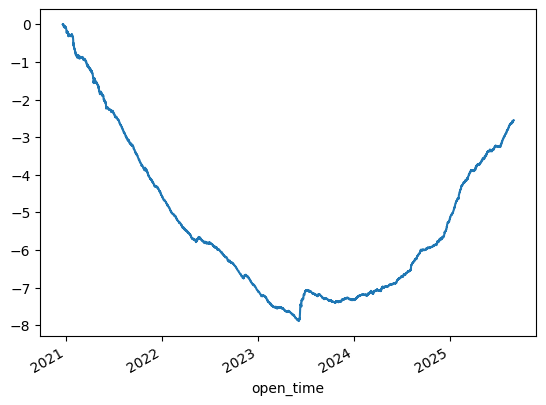

In [7]:
transformed_signal = get_rank_demeaned_normalized_signal(simple_raw_reversal_signal)
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, px)
net_returns.cumsum().plot()

<Axes: xlabel='open_time'>

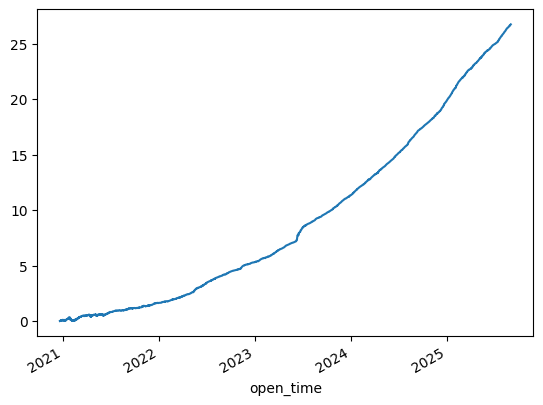

In [8]:
gross_returns.cumsum().plot()

In [9]:
get_strategy_stats(net_returns, 4, px)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': -0.5417910961191515,
 'volatility': 0.2637606139161894,
 'sharpe ratio': -2.0541015888418697,
 'max drawdown': -2252.7514939157913,
 'max drawdown duration': 1713.0,
 'alpha_BTC': -0.00025204855897909575,
 'beta_BTC': 0.020664750027787882}

# Strategy 2: Winsorize Simple One-Period (4h) Reversal Signal

In [10]:
ret = px / px.shift() - 1
raw_signal = ret * -1

### With limits of 10% on each side

In [11]:
winsorized_signal_10 = get_winsorized_signal(raw_signal, 0.1, 0.1)
winsorized_signal_10

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,LTCUSDT,BCHUSDT,LINKUSDT,...,BNTUSDT,ZENUSDT,NMRUSDT,RVNUSDT,IOSTUSDT,OXTUSDT,CRVUSDT,HNTUSDT,BALUSDT,CHZUSDT
open_time,,,,,,,,,,,,,,,,,,,,,
2020-12-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-20 04:00:00,-0.010716,-0.013315,-0.020863,-0.020863,-0.017069,NaN,NaN,-0.020863,-0.020863,NaN,...,NaN,-0.004230,NaN,NaN,NaN,0.006019,NaN,-0.014607,NaN,NaN
2020-12-20 08:00:00,0.002319,0.003587,0.010518,-0.007803,-0.000553,NaN,NaN,0.026463,-0.007803,NaN,...,NaN,-0.007803,NaN,NaN,NaN,-0.000000,NaN,-0.007803,NaN,NaN
2020-12-20 12:00:00,-0.014070,-0.000551,-0.004799,-0.005433,0.002589,NaN,NaN,-0.008553,-0.014172,NaN,...,NaN,0.013320,NaN,NaN,NaN,-0.014172,NaN,-0.014172,NaN,NaN
2020-12-20 16:00:00,0.003950,0.005235,0.003950,0.008791,0.008512,NaN,NaN,0.020991,0.011406,NaN,...,NaN,0.005466,NaN,NaN,NaN,0.011844,NaN,0.027506,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-30 16:00:00,-0.000563,0.005439,0.003769,0.002863,0.000178,-0.003310,NaN,0.003526,0.005505,0.002136,...,0.069320,-0.000000,-0.003310,-0.000000,-0.0,-0.000000,-0.000000,NaN,NaN,-0.000000
2025-08-30 20:00:00,0.003231,-0.005161,-0.002685,-0.006840,-0.004346,0.011268,NaN,-0.004899,-0.010767,-0.004709,...,-0.000000,-0.000000,0.087846,-0.000000,-0.0,-0.000000,-0.000000,NaN,NaN,-0.000000
2025-08-31 00:00:00,-0.005397,-0.025655,-0.017281,-0.001009,-0.011492,-0.024914,NaN,-0.008125,0.002894,-0.018321,...,-0.045067,-0.000000,-0.003298,-0.022676,-0.0,-0.000000,-0.037928,NaN,NaN,-0.045067


<Axes: >

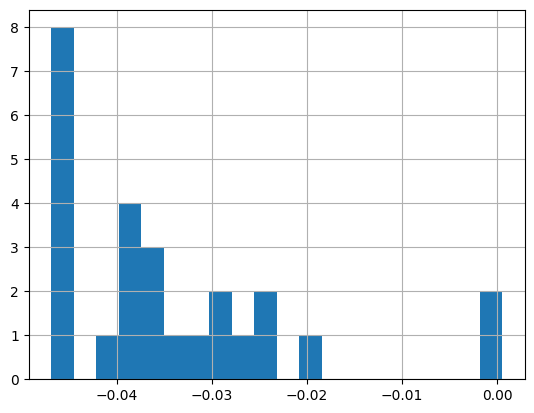

In [12]:
winsorized_signal_10.iloc[200].hist(bins=20)

In [13]:
transformed_signal = get_rank_demeaned_normalized_signal(winsorized_signal_10)
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, px)
net_returns

open_time
2020-12-20 00:00:00    0.000000
2020-12-20 04:00:00   -0.002000
2020-12-20 08:00:00    0.005209
2020-12-20 12:00:00   -0.004331
2020-12-20 16:00:00   -0.000546
                         ...   
2025-08-30 16:00:00    0.002794
2025-08-30 20:00:00    0.001231
2025-08-31 00:00:00    0.001694
2025-08-31 04:00:00    0.001376
2025-08-31 08:00:00   -0.004966
Length: 10291, dtype: float64

<Axes: xlabel='open_time'>

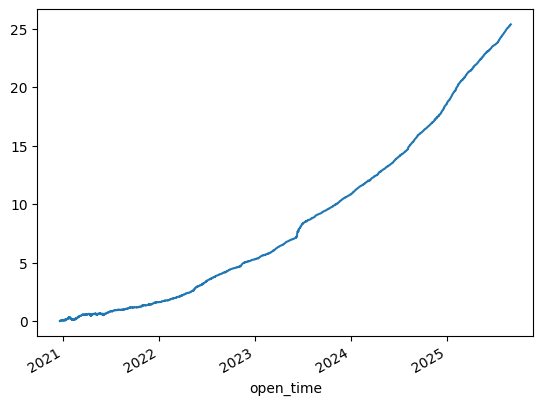

In [14]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

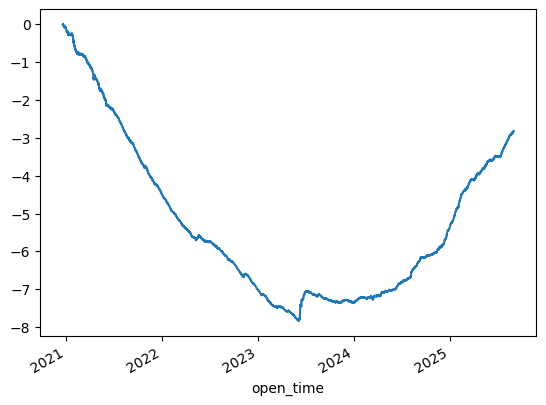

In [15]:
net_returns.cumsum().plot()

In [16]:
get_strategy_stats(net_returns, 4, px)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': -0.5991416410969319,
 'volatility': 0.25168019337552155,
 'sharpe ratio': -2.3805673106861356,
 'max drawdown': -1872.3806295420725,
 'max drawdown duration': 1713.0,
 'alpha_BTC': -0.00027389326097429316,
 'beta_BTC': 0.0019530313411737629}

### With limits of 20% on each side

In [17]:
winsorized_signal_20 = get_winsorized_signal(raw_signal, 0.2, 0.2)

<Axes: >

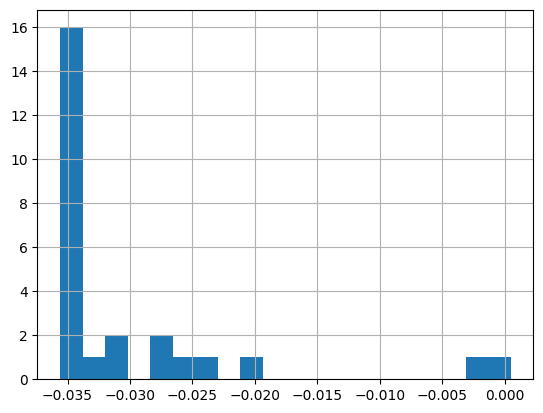

In [18]:
winsorized_signal_20.iloc[200].hist(bins=20)

In [19]:
transformed_signal = get_rank_demeaned_normalized_signal(winsorized_signal_20)
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, px)
net_returns

open_time
2020-12-20 00:00:00    0.000000
2020-12-20 04:00:00   -0.002000
2020-12-20 08:00:00    0.005012
2020-12-20 12:00:00   -0.003288
2020-12-20 16:00:00   -0.000033
                         ...   
2025-08-30 16:00:00    0.002715
2025-08-30 20:00:00   -0.000254
2025-08-31 00:00:00   -0.003713
2025-08-31 04:00:00    0.002308
2025-08-31 08:00:00   -0.002980
Length: 10291, dtype: float64

<Axes: xlabel='open_time'>

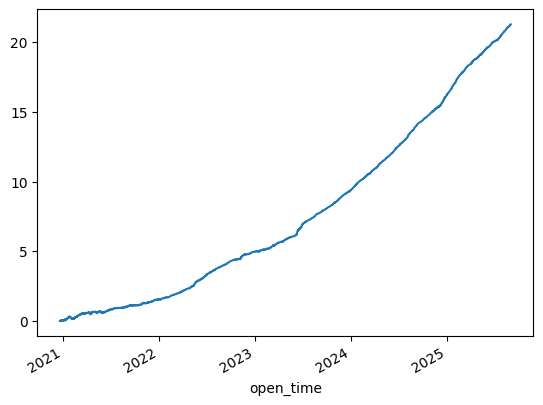

In [20]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

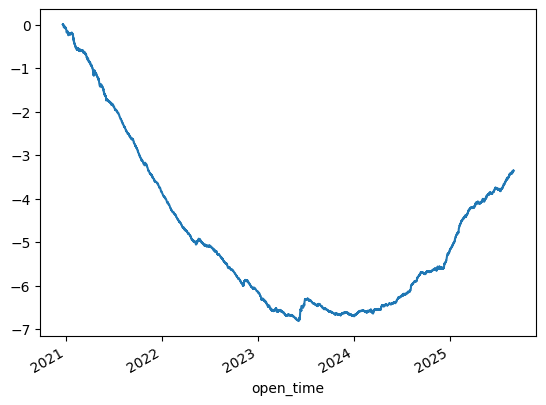

In [21]:
net_returns.cumsum().plot()

In [22]:
get_strategy_stats(net_returns, 4, px)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': -0.7135629472369659,
 'volatility': 0.22185812381942818,
 'sharpe ratio': -3.2163029910851475,
 'max drawdown': -1291.186159727889,
 'max drawdown duration': 1714.1666666666667,
 'alpha_BTC': -0.0003130456320925331,
 'beta_BTC': -0.05444637446100382}

# Strategy 3: Truncate Simple One-Period (4h) Reversal Signal

In [23]:
ret = px / px.shift() - 1
raw_signal = ret * -1

### Truncate top and bottom 2%

In [24]:
truncated_signal = get_truncated_signal(raw_signal, 0.02, 0.02)

In [25]:
transformed_signal = get_rank_demeaned_normalized_signal(truncated_signal)
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, px)
net_returns

open_time
2020-12-20 00:00:00    0.000000
2020-12-20 04:00:00   -0.002000
2020-12-20 08:00:00    0.008513
2020-12-20 12:00:00   -0.003174
2020-12-20 16:00:00   -0.002331
                         ...   
2025-08-30 16:00:00    0.000388
2025-08-30 20:00:00   -0.000223
2025-08-31 00:00:00    0.003503
2025-08-31 04:00:00    0.001613
2025-08-31 08:00:00   -0.004087
Length: 10291, dtype: float64

<Axes: xlabel='open_time'>

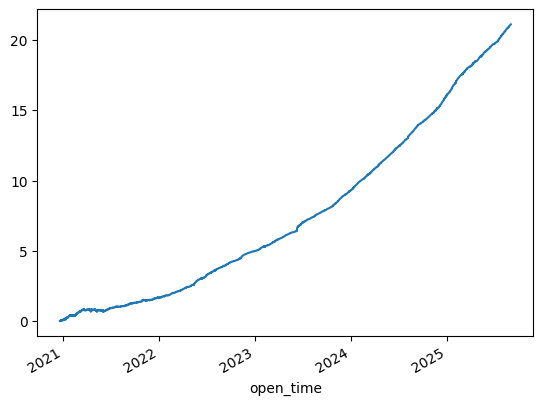

In [26]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

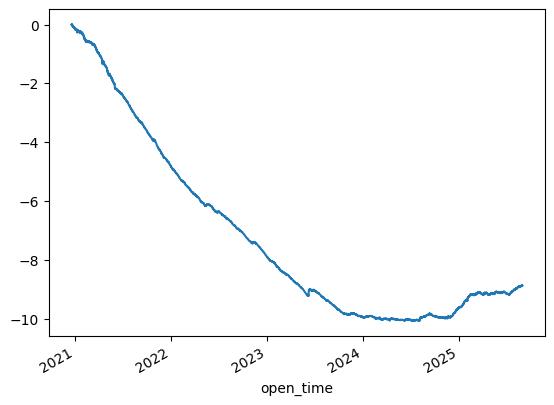

In [27]:
net_returns.cumsum().plot()

In [28]:
get_strategy_stats(net_returns, 4, px)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': -1.8875203317937959,
 'volatility': 0.22289183891152073,
 'sharpe ratio': -8.468324102898478,
 'max drawdown': -1046.770683010125,
 'max drawdown duration': 1712.6666666666667,
 'alpha_BTC': -0.0008662856653092652,
 'beta_BTC': 0.019069918430511194}

### Truncate top and bottom 5%

In [29]:
truncated_signal = get_truncated_signal(raw_signal, 0.05, 0.05)

In [30]:
transformed_signal = get_rank_demeaned_normalized_signal(truncated_signal)
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, px)
net_returns

open_time
2020-12-20 00:00:00    0.000000
2020-12-20 04:00:00   -0.002000
2020-12-20 08:00:00    0.008163
2020-12-20 12:00:00   -0.003596
2020-12-20 16:00:00   -0.002719
                         ...   
2025-08-30 16:00:00   -0.001140
2025-08-30 20:00:00    0.001623
2025-08-31 00:00:00    0.002691
2025-08-31 04:00:00    0.002246
2025-08-31 08:00:00   -0.004314
Length: 10291, dtype: float64

<Axes: xlabel='open_time'>

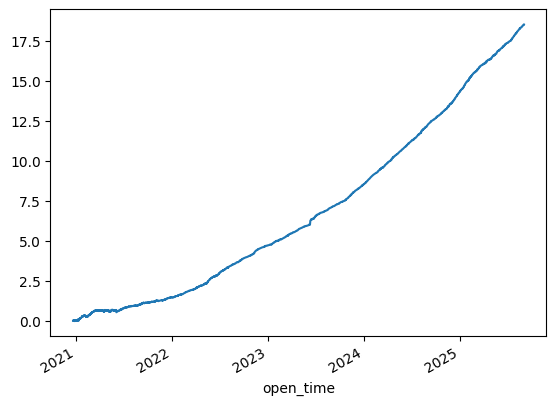

In [31]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

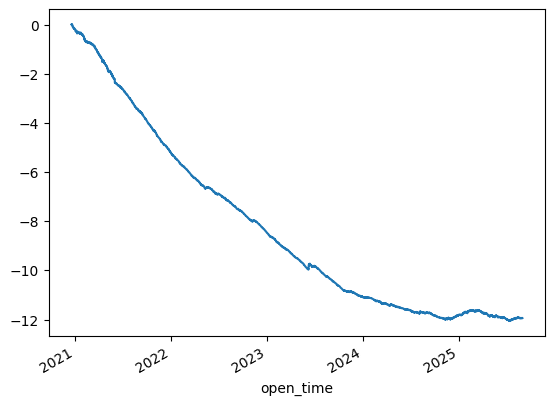

In [32]:
net_returns.cumsum().plot()

In [33]:
get_strategy_stats(net_returns, 4, px)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': -2.5406752904476027,
 'volatility': 0.21734183061906295,
 'sharpe ratio': -11.689766683251452,
 'max drawdown': -1284.3898937271772,
 'max drawdown duration': 1714.0,
 'alpha_BTC': -0.0011640201644547803,
 'beta_BTC': 0.016626520078666614}

### Truncate top and bottom 10%

In [34]:
truncated_signal = get_truncated_signal(raw_signal, 0.1, 0.1)

In [35]:
transformed_signal = get_rank_demeaned_normalized_signal(truncated_signal)
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, px)
net_returns

open_time
2020-12-20 00:00:00    0.000000
2020-12-20 04:00:00   -0.002000
2020-12-20 08:00:00    0.011378
2020-12-20 12:00:00   -0.003007
2020-12-20 16:00:00   -0.001665
                         ...   
2025-08-30 16:00:00   -0.001659
2025-08-30 20:00:00   -0.002100
2025-08-31 00:00:00    0.000316
2025-08-31 04:00:00    0.002444
2025-08-31 08:00:00   -0.005036
Length: 10291, dtype: float64

<Axes: xlabel='open_time'>

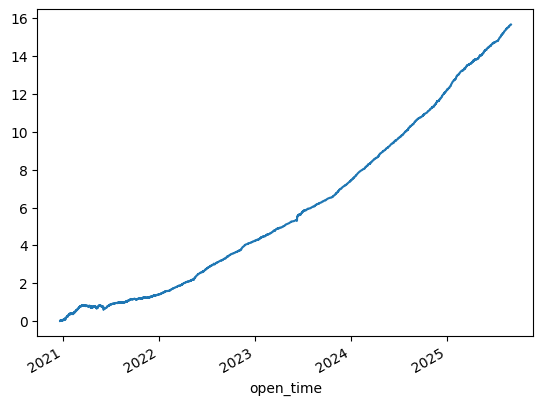

In [36]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

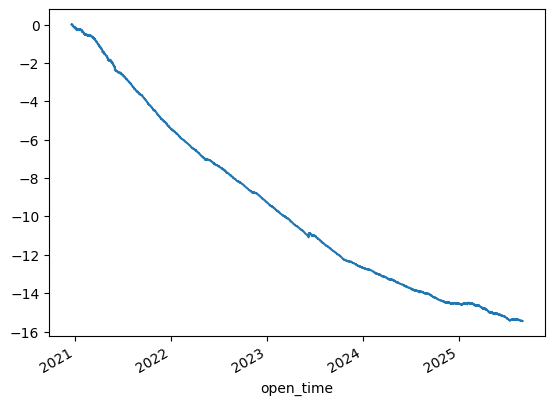

In [37]:
net_returns.cumsum().plot()

In [38]:
get_strategy_stats(net_returns, 4, px)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': -3.2884305621402614,
 'volatility': 0.22306134685455964,
 'sharpe ratio': -14.742269821783072,
 'max drawdown': -1040.0631471076124,
 'max drawdown duration': 1714.0,
 'alpha_BTC': -0.0015052871168824752,
 'beta_BTC': 0.015592860533197885}

### Truncate top and bottom 20%

In [39]:
truncated_signal = get_truncated_signal(raw_signal, 0.2, 0.2)

In [40]:
transformed_signal = get_rank_demeaned_normalized_signal(truncated_signal)
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, px)
net_returns

open_time
2020-12-20 00:00:00    0.000000
2020-12-20 04:00:00   -0.002000
2020-12-20 08:00:00   -0.003592
2020-12-20 12:00:00   -0.003317
2020-12-20 16:00:00   -0.001082
                         ...   
2025-08-30 16:00:00   -0.002325
2025-08-30 20:00:00   -0.001595
2025-08-31 00:00:00   -0.000541
2025-08-31 04:00:00    0.000807
2025-08-31 08:00:00   -0.003870
Length: 10291, dtype: float64

<Axes: xlabel='open_time'>

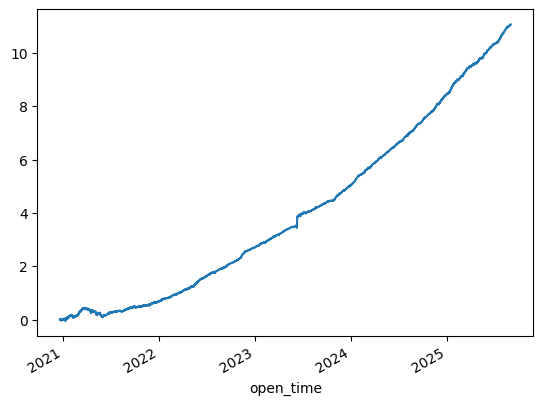

In [41]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

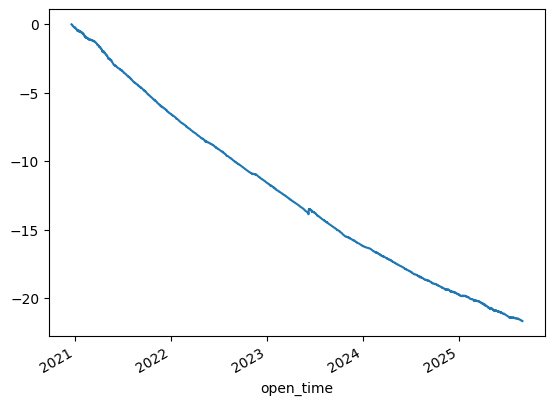

In [42]:
net_returns.cumsum().plot()

In [43]:
get_strategy_stats(net_returns, 4, px)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': -4.613967098266714,
 'volatility': 0.2380324873159387,
 'sharpe ratio': -19.38377046887146,
 'max drawdown': nan,
 'max drawdown duration': 1715.0,
 'alpha_BTC': -0.0021096606581416247,
 'beta_BTC': 0.01123781852177235}

# Strategy 4: Rank-Threshold Simple One-Period (4h) Reversal Signal

In [44]:
ret = px / px.shift() - 1
raw_signal = ret * -1

### Rank-threshold top and bottom 20%

In [45]:
rank_thresholded_signal = get_rank_thresholded_signal(raw_signal, 0.2, 0.2)

In [46]:
transformed_signal = get_rank_demeaned_normalized_signal(rank_thresholded_signal)
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, px)
net_returns

open_time
2020-12-20 00:00:00    0.000000
2020-12-20 04:00:00   -0.002000
2020-12-20 08:00:00    0.005682
2020-12-20 12:00:00   -0.006909
2020-12-20 16:00:00    0.000958
                         ...   
2025-08-30 16:00:00    0.008306
2025-08-30 20:00:00    0.001972
2025-08-31 00:00:00    0.001854
2025-08-31 04:00:00    0.001235
2025-08-31 08:00:00   -0.005674
Length: 10291, dtype: float64

<Axes: xlabel='open_time'>

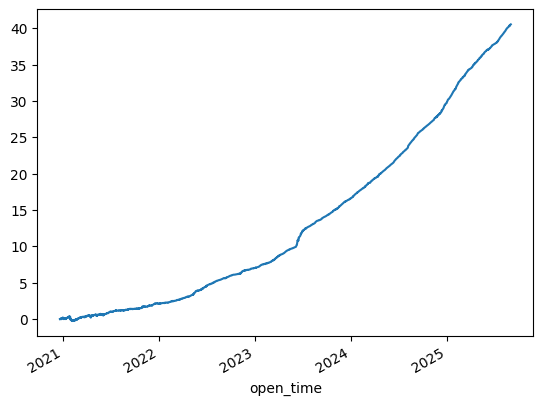

In [47]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

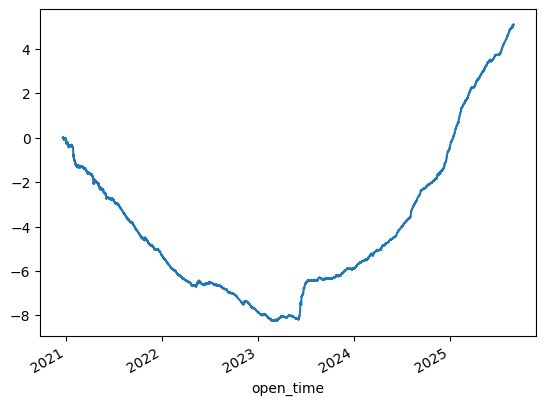

In [48]:
net_returns.cumsum().plot()

In [49]:
get_strategy_stats(net_returns, 4, px)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': 1.0857968253558516,
 'volatility': 0.4550933395769632,
 'sharpe ratio': 2.385877205685246,
 'max drawdown': -820.0710230143179,
 'max drawdown duration': 1483.0,
 'alpha_BTC': 0.000489749404115838,
 'beta_BTC': 0.027280918509055414}

### Rank-threshold top and bottom 10%

In [50]:
rank_thresholded_signal = get_rank_thresholded_signal(raw_signal, 0.1, 0.1)

In [51]:
transformed_signal = get_rank_demeaned_normalized_signal(rank_thresholded_signal)
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, px)
net_returns

open_time
2020-12-20 00:00:00    0.000000
2020-12-20 04:00:00   -0.002000
2020-12-20 08:00:00   -0.006608
2020-12-20 12:00:00   -0.010079
2020-12-20 16:00:00    0.004580
                         ...   
2025-08-30 16:00:00    0.015151
2025-08-30 20:00:00    0.000669
2025-08-31 00:00:00   -0.002035
2025-08-31 04:00:00   -0.001132
2025-08-31 08:00:00   -0.005019
Length: 10291, dtype: float64

<Axes: xlabel='open_time'>

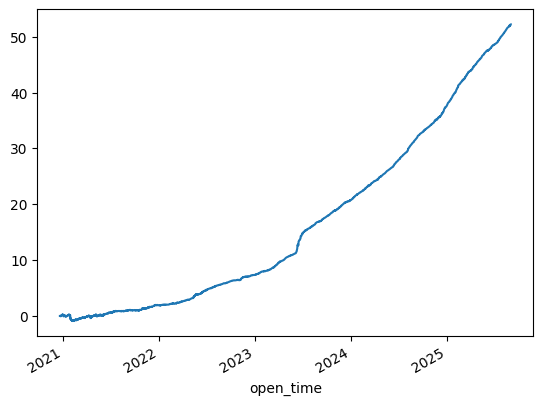

In [52]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

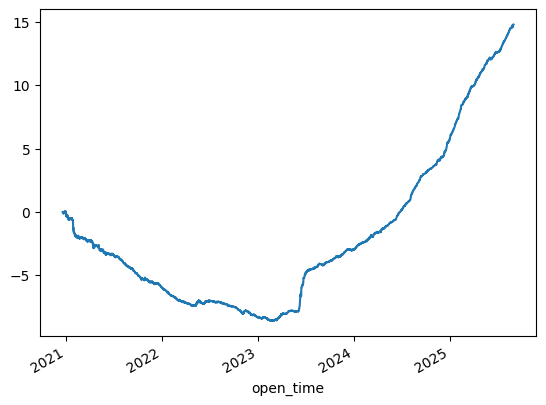

In [53]:
net_returns.cumsum().plot()

In [54]:
get_strategy_stats(net_returns, 4, px)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': 3.1537162400103176,
 'volatility': 0.7213817283766352,
 'sharpe ratio': 4.3717717207882405,
 'max drawdown': -164.759021909569,
 'max drawdown duration': 1274.0,
 'alpha_BTC': 0.0014331319045670359,
 'beta_BTC': 0.03182768807866386}

### Rank-threshold top and bottom 5%

In [55]:
rank_thresholded_signal = get_rank_thresholded_signal(raw_signal, 0.05, 0.05)

In [56]:
transformed_signal = get_rank_demeaned_normalized_signal(rank_thresholded_signal)
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, px)
net_returns

open_time
2020-12-20 00:00:00    0.000000
2020-12-20 04:00:00   -0.002000
2020-12-20 08:00:00   -0.009609
2020-12-20 12:00:00   -0.012388
2020-12-20 16:00:00    0.008188
                         ...   
2025-08-30 16:00:00    0.019025
2025-08-30 20:00:00    0.001625
2025-08-31 00:00:00   -0.009624
2025-08-31 04:00:00   -0.003336
2025-08-31 08:00:00   -0.008617
Length: 10291, dtype: float64

<Axes: xlabel='open_time'>

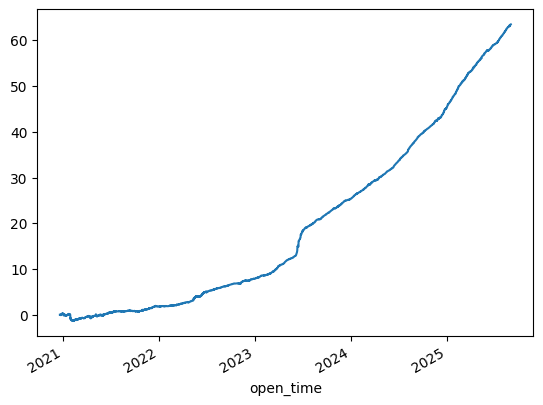

In [57]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

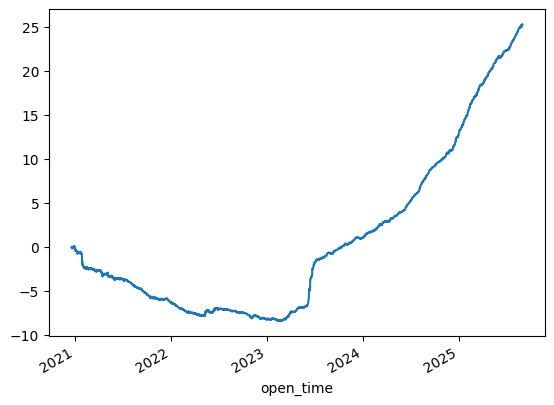

In [58]:
net_returns.cumsum().plot()

In [59]:
get_strategy_stats(net_returns, 4, px)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': 5.368555024456785,
 'volatility': 1.053873505491951,
 'sharpe ratio': 5.094117079972258,
 'max drawdown': -99.93311164126405,
 'max drawdown duration': 1018.8333333333334,
 'alpha_BTC': 0.002443423018928201,
 'beta_BTC': 0.03719601418513714}

### Rank-threshold top and bottom 2%

In [60]:
rank_thresholded_signal = get_rank_thresholded_signal(raw_signal, 0.02, 0.02)

In [61]:
transformed_signal = get_rank_demeaned_normalized_signal(rank_thresholded_signal)
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, px)
net_returns

open_time
2020-12-20 00:00:00    0.000000
2020-12-20 04:00:00   -0.002000
2020-12-20 08:00:00   -0.015849
2020-12-20 12:00:00   -0.015621
2020-12-20 16:00:00    0.011261
                         ...   
2025-08-30 16:00:00    0.016650
2025-08-30 20:00:00    0.001945
2025-08-31 00:00:00   -0.018967
2025-08-31 04:00:00   -0.006797
2025-08-31 08:00:00   -0.012376
Length: 10291, dtype: float64

<Axes: xlabel='open_time'>

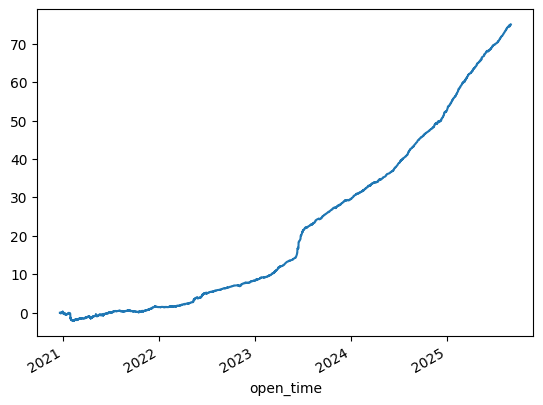

In [62]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

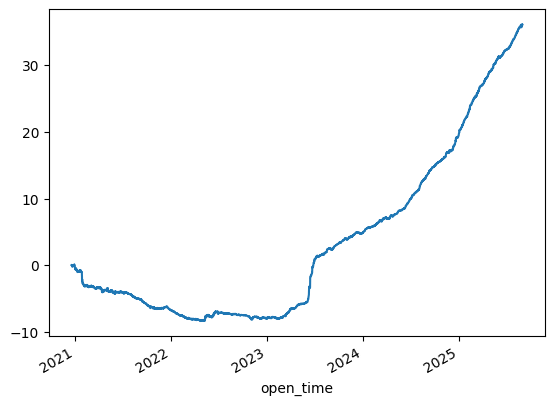

In [63]:
net_returns.cumsum().plot()

In [64]:
get_strategy_stats(net_returns, 4, px)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': 7.69138014219872,
 'volatility': 1.4239693380925023,
 'sharpe ratio': 5.401366403367796,
 'max drawdown': -117.70552632369282,
 'max drawdown duration': 908.8333333333334,
 'alpha_BTC': 0.0035050209830553986,
 'beta_BTC': 0.03400676397495574}

In [72]:
last_row = transformed_signal.iloc[-1]
last_row[last_row.notna()]

YFIUSDT     0.375
MKRUSDT    -0.375
ONTUSDT     0.125
EGLDUSDT   -0.125
Name: 2025-08-31 08:00:00, dtype: float64

# Strategy 5: Inverse CDF Of Simple One-Period (4h) Reversal Signal: Rank, Inverse CDF Then Demean-Normalize

Use inverse standard normal distribution.

In [73]:
ret = px / px.shift() - 1
raw_signal = ret * -1

inverse_cdf_signal = get_inverse_cdf_standard_normal_signal(raw_signal)
transformed_signal = get_demeaned_normalized_signal(inverse_cdf_signal)

In [74]:
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, px)
net_returns

open_time
2020-12-20 00:00:00    0.000000
2020-12-20 04:00:00   -0.002000
2020-12-20 08:00:00    0.004680
2020-12-20 12:00:00   -0.005445
2020-12-20 16:00:00    0.000027
                         ...   
2025-08-30 16:00:00    0.004241
2025-08-30 20:00:00    0.001200
2025-08-31 00:00:00    0.000910
2025-08-31 04:00:00    0.000944
2025-08-31 08:00:00   -0.004816
Length: 10291, dtype: float64

<Axes: xlabel='open_time'>

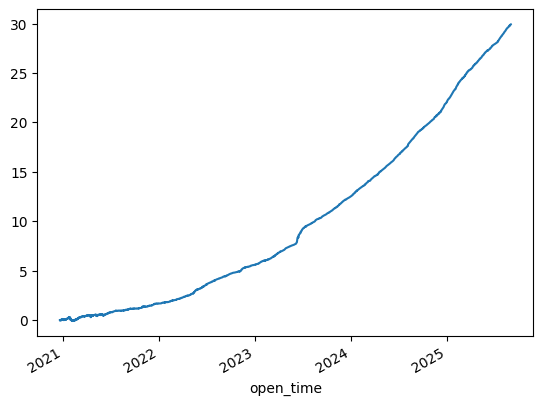

In [75]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

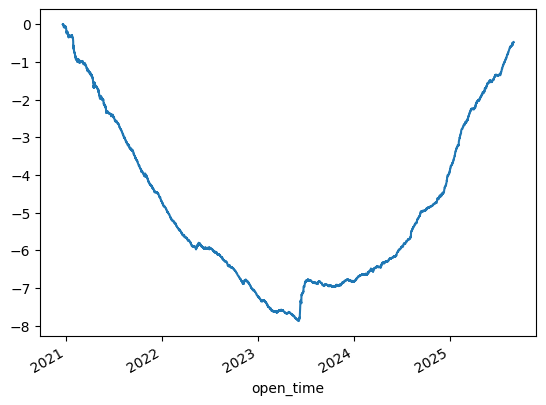

In [76]:
net_returns.cumsum().plot()

In [77]:
get_strategy_stats(net_returns, 4, px)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': -0.09927073885454141,
 'volatility': 0.3044407351992944,
 'sharpe ratio': -0.32607574275353246,
 'max drawdown': -2607.789316731074,
 'max drawdown duration': 1713.0,
 'alpha_BTC': -5.0239572586216144e-05,
 'beta_BTC': 0.021931670261215046}

# Strategy 6: One-Period (4h) Reversal Signal Traded Less Frequently Than One Period

In [82]:
ret = px / px.shift() - 1
raw_signal = ret * -1
transformed_signal = get_rank_demeaned_normalized_signal(raw_signal)

### Trade Every 8 Hours

In [95]:
weights_8h = transformed_signal[
    (transformed_signal.index.hour == 0) |
    (transformed_signal.index.hour == 8) |
    (transformed_signal.index.hour == 16)
]

prices_8h = px[(px.index.hour == 0) | (px.index.hour == 8) | (px.index.hour == 16)]

gross_returns, net_returns = get_gross_returns_and_net_returns(weights_8h, prices_8h)

<Axes: xlabel='open_time'>

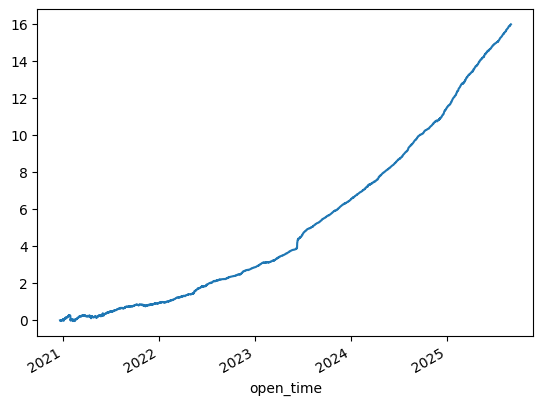

In [96]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

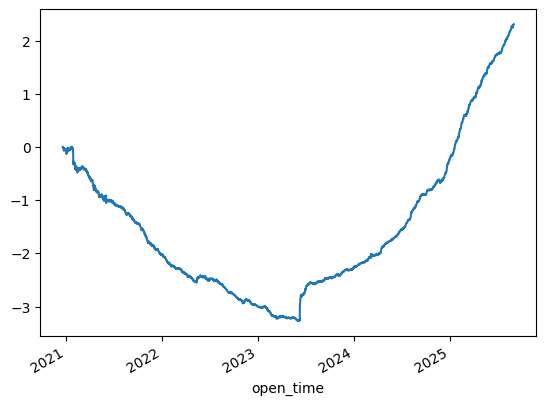

In [97]:
net_returns.cumsum().plot()

In [98]:
get_strategy_stats(net_returns, 8, prices_8h)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': 0.4907906958582843,
 'volatility': 0.27573896021987393,
 'sharpe ratio': 1.7799105917674032,
 'max drawdown': -681.3019871423812,
 'max drawdown duration': 1457.3333333333333,
 'alpha_BTC': 0.0004378963629094421,
 'beta_BTC': 0.02353941925761332}

### Trade Every 12 Hours

In [99]:
weights_12h = transformed_signal[
    (transformed_signal.index.hour == 0) |
    (transformed_signal.index.hour == 12)
]

prices_12h = px[(px.index.hour == 0) | (px.index.hour == 12)]

gross_returns, net_returns = get_gross_returns_and_net_returns(weights_12h, prices_12h)

<Axes: xlabel='open_time'>

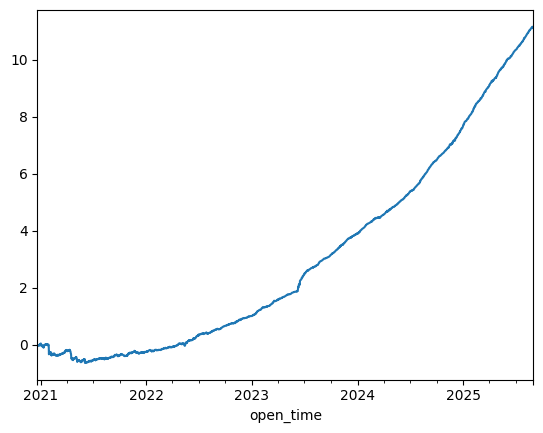

In [100]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

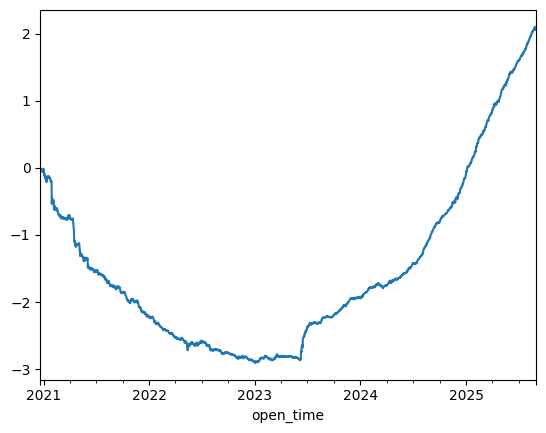

In [101]:
net_returns.cumsum().plot()

In [102]:
get_strategy_stats(net_returns, 12, prices_12h)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': 0.4433270543245187,
 'volatility': 0.2733435696679309,
 'sharpe ratio': 1.621867508583029,
 'max drawdown': -0.3113875498601236,
 'max drawdown duration': 1476.0,
 'alpha_BTC': 0.0006022633923928933,
 'beta_BTC': 0.008747909076329335}

### Trade Every 24 Hours

In [103]:
weights_24h = transformed_signal[
    transformed_signal.index.hour == 0
]

prices_24h = px[px.index.hour == 0]

gross_returns, net_returns = get_gross_returns_and_net_returns(weights_24h, prices_24h)

<Axes: xlabel='open_time'>

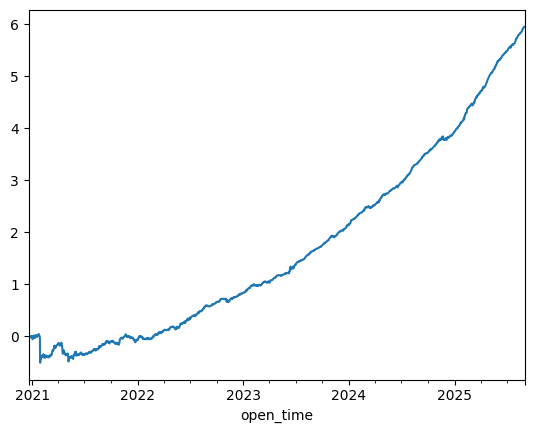

In [104]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

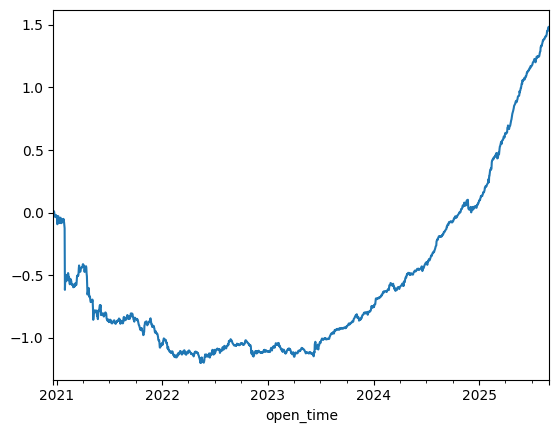

In [105]:
net_returns.cumsum().plot()

In [106]:
get_strategy_stats(net_returns, 24, prices_24h)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': 0.31478775595136693,
 'volatility': 0.3148278881113717,
 'sharpe ratio': 0.9998725266676802,
 'max drawdown': -106.50197712231366,
 'max drawdown duration': 1406.0,
 'alpha_BTC': 0.0008388165966022477,
 'beta_BTC': 0.01881183600603965}

# Strategy 7: Multiple-Period Reversal Signal Traded Less Frequently Than One Period

### Two Periods (8h frequency)

In [115]:
prices_8h = px[(px.index.hour == 0) | (px.index.hour == 8) | (px.index.hour == 16)]

ret = prices_8h / prices_8h.shift() - 1
raw_signal = ret * -1

transformed_signal = get_rank_demeaned_normalized_signal(raw_signal)

In [116]:
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, prices_8h)

<Axes: xlabel='open_time'>

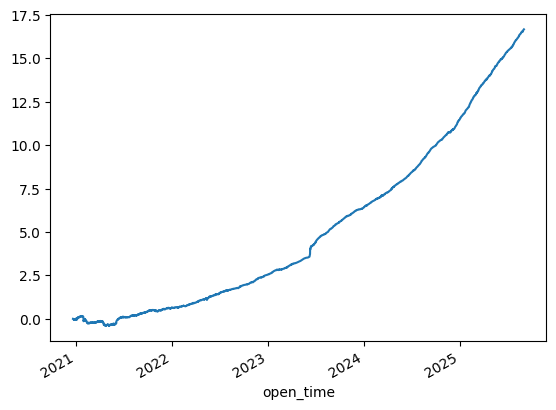

In [117]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

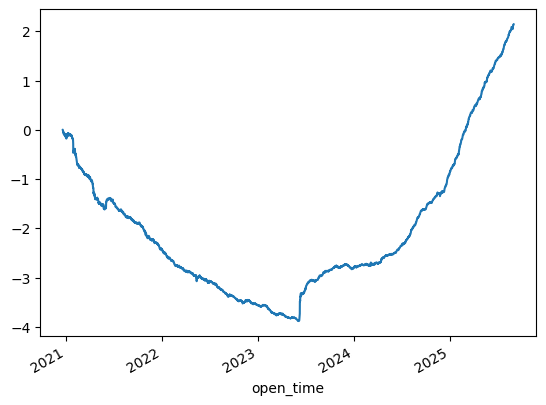

In [118]:
net_returns.cumsum().plot()

In [119]:
get_strategy_stats(net_returns, 8, prices_8h)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': 0.45620268171155387,
 'volatility': 0.28011090417334766,
 'sharpe ratio': 1.6286502057386212,
 'max drawdown': -0.2562911109121253,
 'max drawdown duration': 1531.6666666666667,
 'alpha_BTC': 0.0004118586751560868,
 'beta_BTC': 0.011503252316157522}

### Three Periods (12h frequency)

In [120]:
prices_12h = px[(px.index.hour == 0) | (px.index.hour == 12)]

ret = prices_12h / prices_12h.shift() - 1
raw_signal = ret * -1

transformed_signal = get_rank_demeaned_normalized_signal(raw_signal)

In [121]:
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, prices_12h)

<Axes: xlabel='open_time'>

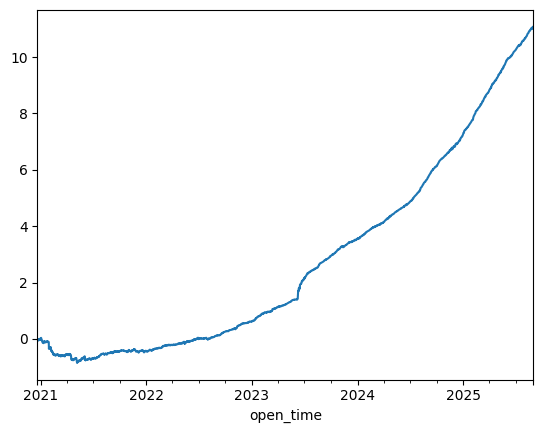

In [122]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

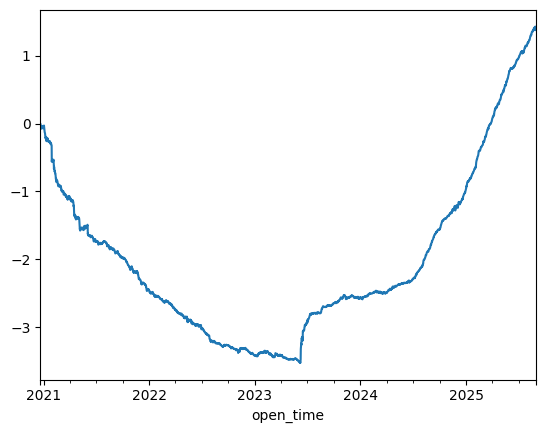

In [123]:
net_returns.cumsum().plot()

In [124]:
get_strategy_stats(net_returns, 12, prices_12h)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': 0.30329867084434486,
 'volatility': 0.27751087330391266,
 'sharpe ratio': 1.0929253590441879,
 'max drawdown': -1.8073860670379518,
 'max drawdown duration': 1557.0,
 'alpha_BTC': 0.0004116054202603101,
 'beta_BTC': 0.006882113031835967}

### Two Periods (8h frequency), 4h offset

In [125]:
prices_8h = px[(px.index.hour == 4) | (px.index.hour == 12) | (px.index.hour == 20)]

ret = prices_8h / prices_8h.shift() - 1
raw_signal = ret * -1

transformed_signal = get_rank_demeaned_normalized_signal(raw_signal)

In [126]:
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, prices_8h)

<Axes: xlabel='open_time'>

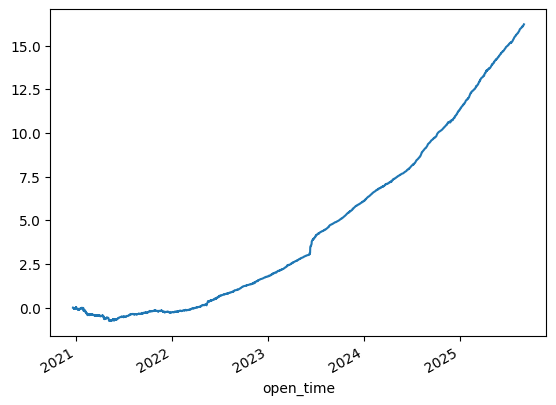

In [127]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

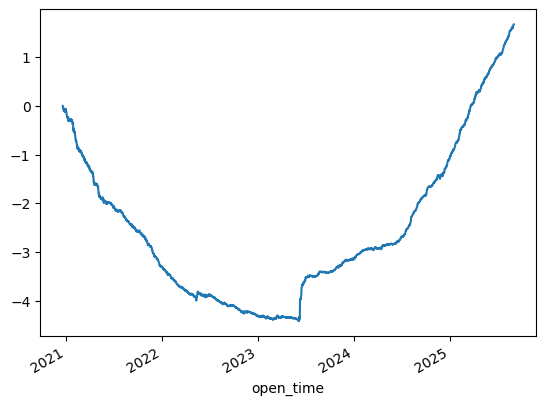

In [128]:
net_returns.cumsum().plot()

In [129]:
get_strategy_stats(net_returns, 8, prices_8h)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': 0.35637291288139594,
 'volatility': 0.2716336551008287,
 'sharpe ratio': 1.311961556270016,
 'max drawdown': -0.38669375024699904,
 'max drawdown duration': 1551.3333333333333,
 'alpha_BTC': 0.00031502616327939585,
 'beta_BTC': 0.024102846905552408}

### Three Periods (12h frequency), 4h offset

In [130]:
prices_12h = px[(px.index.hour == 4) | (px.index.hour == 16)]

ret = prices_12h / prices_12h.shift() - 1
raw_signal = ret * -1

transformed_signal = get_rank_demeaned_normalized_signal(raw_signal)

In [131]:
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, prices_12h)

<Axes: xlabel='open_time'>

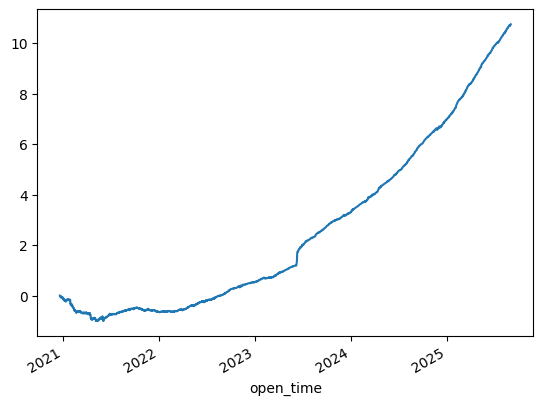

In [132]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

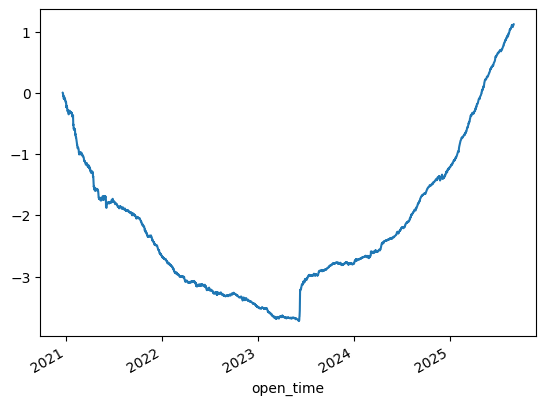

In [133]:
net_returns.cumsum().plot()

In [134]:
get_strategy_stats(net_returns, 12, prices_12h)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': 0.23777865102834142,
 'volatility': 0.26326051844969267,
 'sharpe ratio': 0.9032066503119774,
 'max drawdown': -0.12922735669713248,
 'max drawdown duration': 1592.5,
 'alpha_BTC': 0.000317099587111501,
 'beta_BTC': 0.013812174785348186}

### Three Periods (12h Frequency), 8h offset

In [135]:
prices_12h = px[(px.index.hour == 8) | (px.index.hour == 20)]

ret = prices_12h / prices_12h.shift() - 1
raw_signal = ret * -1

transformed_signal = get_rank_demeaned_normalized_signal(raw_signal)

In [136]:
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, prices_12h)

<Axes: xlabel='open_time'>

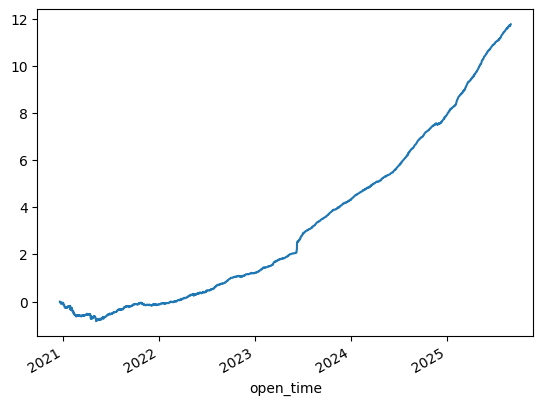

In [137]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

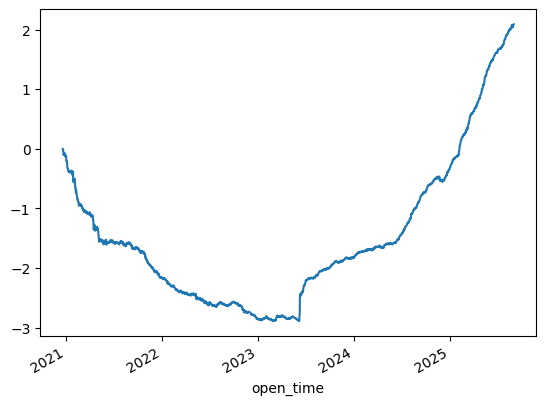

In [138]:
net_returns.cumsum().plot()

In [139]:
get_strategy_stats(net_returns, 12, prices_12h)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': 0.44457051015483573,
 'volatility': 0.2704041578499987,
 'sharpe ratio': 1.6440964284338124,
 'max drawdown': -0.04126208533529341,
 'max drawdown duration': 1507.5,
 'alpha_BTC': 0.0005964798227104829,
 'beta_BTC': 0.019224939365340525}

### Six Periods (24h Frequency)

In [140]:
prices_24h = px[px.index.hour == 0]

ret = prices_24h / prices_24h.shift() - 1
raw_signal = ret * -1

transformed_signal = get_rank_demeaned_normalized_signal(raw_signal)

In [141]:
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, prices_24h)

<Axes: xlabel='open_time'>

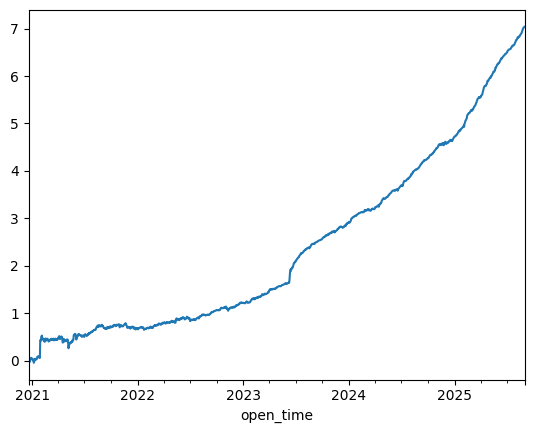

In [142]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

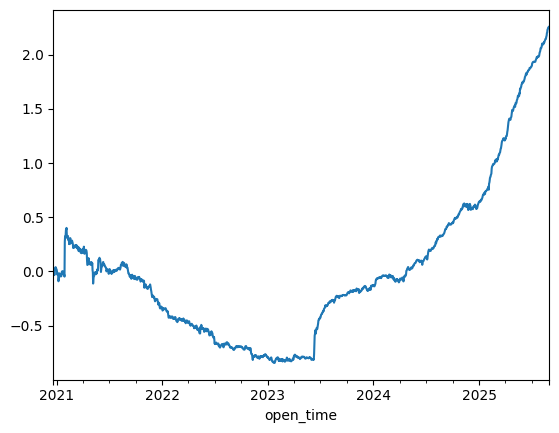

In [143]:
net_returns.cumsum().plot()

In [144]:
get_strategy_stats(net_returns, 24, prices_24h)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': 0.4799681950090557,
 'volatility': 0.276879003868989,
 'sharpe ratio': 1.733494372278811,
 'max drawdown': -3.6885976834774485,
 'max drawdown duration': 1313.0,
 'alpha_BTC': 0.0012380505616458395,
 'beta_BTC': 0.05808818287611553}

### Six Periods (24h Frequency), Offset 8h

In [145]:
prices_24h = px[px.index.hour == 8]

ret = prices_24h / prices_24h.shift() - 1
raw_signal = ret * -1

transformed_signal = get_rank_demeaned_normalized_signal(raw_signal)

In [146]:
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, prices_24h)

<Axes: xlabel='open_time'>

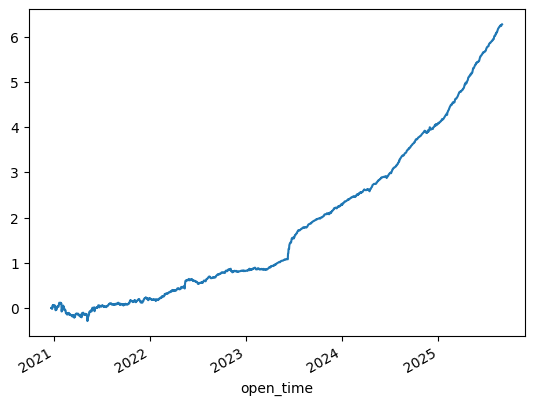

In [147]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

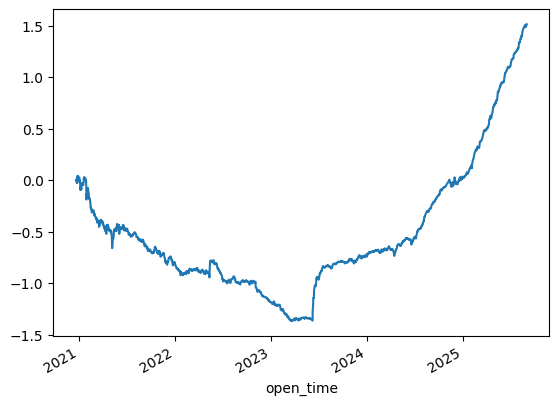

In [148]:
net_returns.cumsum().plot()

In [149]:
get_strategy_stats(net_returns, 24, prices_24h)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': 0.32185785319020044,
 'volatility': 0.2531363248333716,
 'sharpe ratio': 1.2714803116544617,
 'max drawdown': -34.09252102696366,
 'max drawdown duration': 1472.0,
 'alpha_BTC': 0.0008819578875841324,
 'beta_BTC': 0.0014312757385426499}

### Six Periods (24h Frequency), Offset 12h

In [150]:
prices_24h = px[px.index.hour == 12]

ret = prices_24h / prices_24h.shift() - 1
raw_signal = ret * -1

transformed_signal = get_rank_demeaned_normalized_signal(raw_signal)

In [151]:
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, prices_24h)

<Axes: xlabel='open_time'>

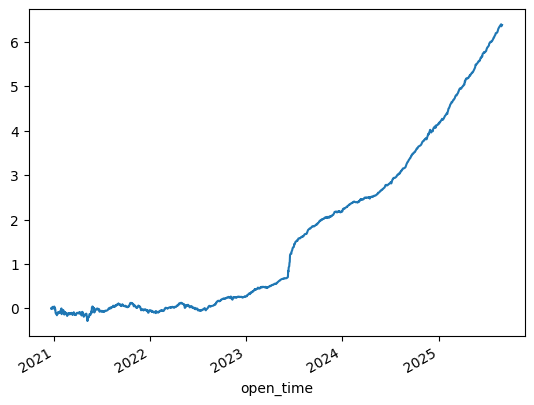

In [152]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

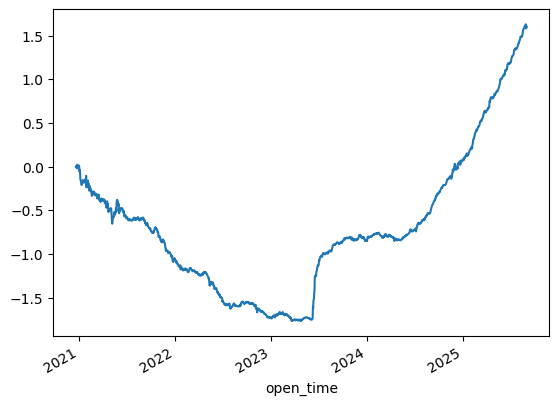

In [153]:
net_returns.cumsum().plot()

In [154]:
get_strategy_stats(net_returns, 24, prices_24h)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': 0.3409970623041058,
 'volatility': 0.26633977748901005,
 'sharpe ratio': 1.280308429776984,
 'max drawdown': -81.84902295902238,
 'max drawdown duration': 1434.0,
 'alpha_BTC': 0.000909845405385501,
 'beta_BTC': 0.018872341591304114}

# Strategy 8: Use Raw One-Period (4h) Reversal Signal (Don't Rank But Do Demean-Normalize)

In [160]:
ret = px / px.shift() - 1
raw_signal = ret * -1
transformed_signal = get_demeaned_normalized_signal(raw_signal)

In [161]:
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, px)

<Axes: xlabel='open_time'>

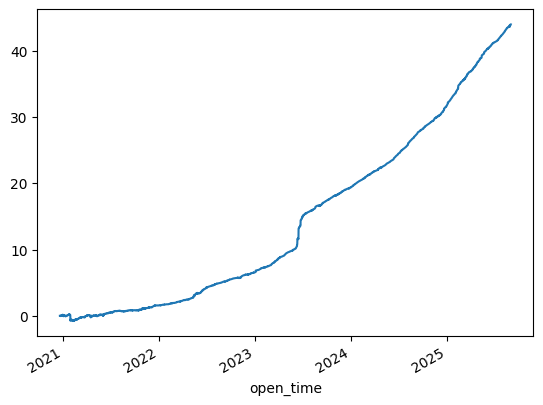

In [162]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

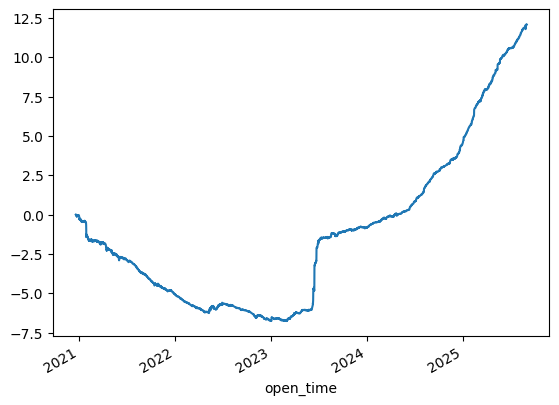

In [163]:
net_returns.cumsum().plot()

In [164]:
get_strategy_stats(net_returns, 4, px)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': 2.5719698716189514,
 'volatility': 1.0091196900201524,
 'sharpe ratio': 2.548726278017218,
 'max drawdown': -2.095101459591535,
 'max drawdown duration': 1212.8333333333333,
 'alpha_BTC': 0.0011671827414081216,
 'beta_BTC': 0.03294628398157088}

# Strategy 9: Multiple-Period Reversal Signal Traded Every Period

### Price Change Over 8 Hours

In [13]:
ret = px / px.shift(2) - 1
raw_signal = -1 * ret
transformed_signal = get_rank_demeaned_normalized_signal(raw_signal)
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, px)
net_returns

open_time
2020-12-20 00:00:00    0.000000
2020-12-20 04:00:00    0.000000
2020-12-20 08:00:00   -0.002000
2020-12-20 12:00:00   -0.006960
2020-12-20 16:00:00   -0.001425
                         ...   
2025-08-30 16:00:00    0.004055
2025-08-30 20:00:00    0.001682
2025-08-31 00:00:00    0.000036
2025-08-31 04:00:00    0.001867
2025-08-31 08:00:00   -0.002286
Length: 10291, dtype: float64

<Axes: xlabel='open_time'>

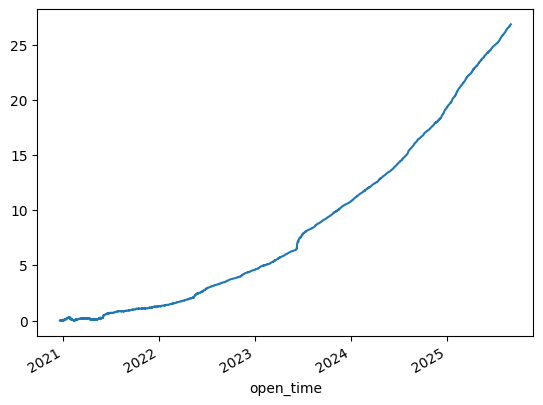

In [14]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

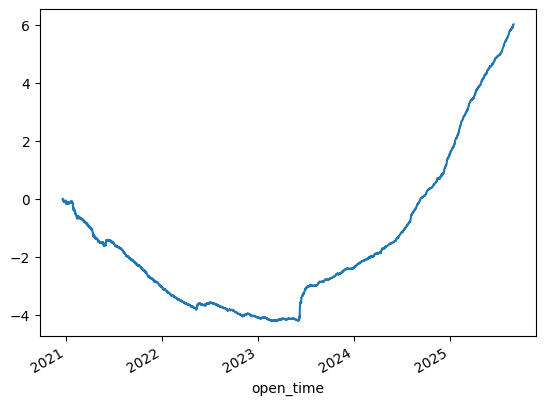

In [15]:
net_returns.cumsum().plot()

In [16]:
get_strategy_stats(net_returns, 4, px)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1162/3733429805.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': 1.2846476576733588,
 'volatility': 0.29705483855829473,
 'sharpe ratio': 4.324614485016229,
 'max drawdown': -0.20614532393703922,
 'max drawdown duration': 1360.5,
 'alpha_BTC': 0.0005799394808280853,
 'beta_BTC': 0.029142933797301936}

### Price Change Over 12 Hours

In [17]:
ret = px / px.shift(3) - 1
raw_signal = -1 * ret
transformed_signal = get_rank_demeaned_normalized_signal(raw_signal)
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, px)
net_returns

open_time
2020-12-20 00:00:00    0.000000
2020-12-20 04:00:00    0.000000
2020-12-20 08:00:00    0.000000
2020-12-20 12:00:00   -0.002000
2020-12-20 16:00:00    0.000650
                         ...   
2025-08-30 16:00:00    0.006626
2025-08-30 20:00:00    0.001749
2025-08-31 00:00:00    0.003672
2025-08-31 04:00:00    0.003141
2025-08-31 08:00:00   -0.000958
Length: 10291, dtype: float64

<Axes: xlabel='open_time'>

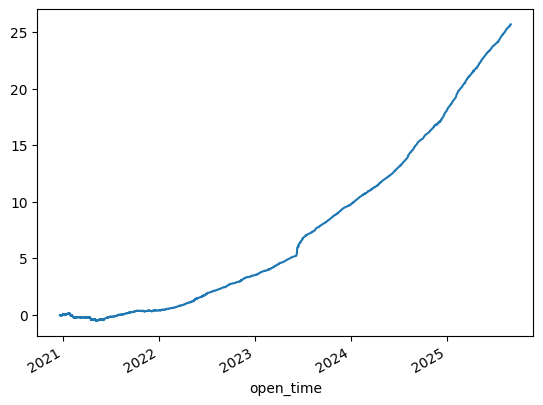

In [18]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

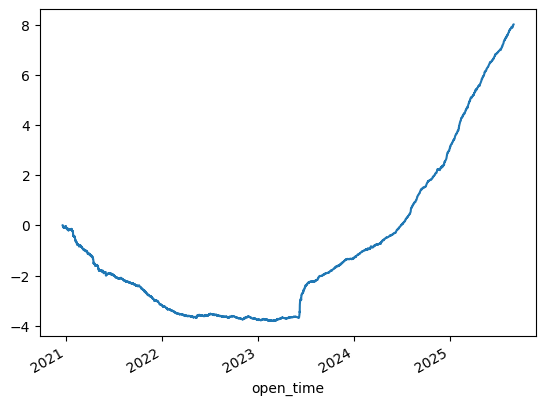

In [19]:
net_returns.cumsum().plot()

In [167]:
pd.Series(get_strategy_stats(net_returns, 4, px))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


avg returns                 2.571970
volatility                  1.009120
sharpe ratio                2.548726
max drawdown               -2.095101
max drawdown duration    1212.833333
alpha_BTC                   0.001167
beta_BTC                    0.032946
dtype: float64

# Strategy 10: Winsorize Un-ranked Demean-Normalized Reversal Signal

In [184]:
rets = px / px.shift() - 1
raw_signal = rets * -1
transformed_signal = get_demeaned_normalized_signal(raw_signal)

### Winsorize Top And Bottom 2%

In [178]:
winsorized_signal = get_winsorized_signal(transformed_signal, 0.02, 0.02)
gross_returns, net_returns = get_gross_returns_and_net_returns(winsorized_signal, px)

<Axes: xlabel='open_time'>

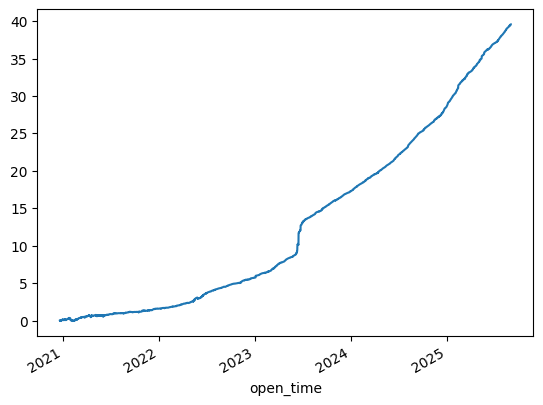

In [179]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

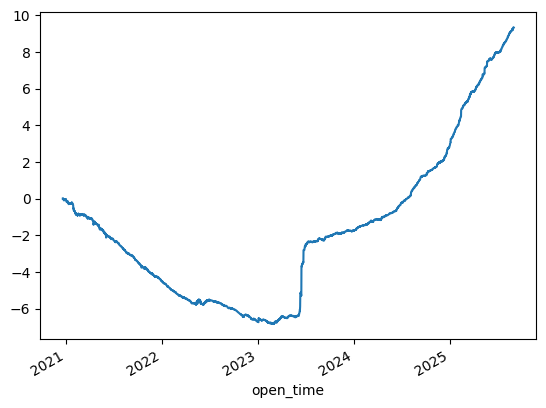

In [180]:
net_returns.cumsum().plot()

In [181]:
pd.Series(get_strategy_stats(net_returns, 4, px))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


avg returns                 1.987124
volatility                  0.920843
sharpe ratio                2.157939
max drawdown            -2175.164322
max drawdown duration    1308.500000
alpha_BTC                   0.000886
beta_BTC                    0.095201
dtype: float64

### Winsorize Top And Bottom 5%

In [185]:
winsorized_signal = get_winsorized_signal(transformed_signal, 0.05, 0.05)
gross_returns, net_returns = get_gross_returns_and_net_returns(winsorized_signal, px)

<Axes: xlabel='open_time'>

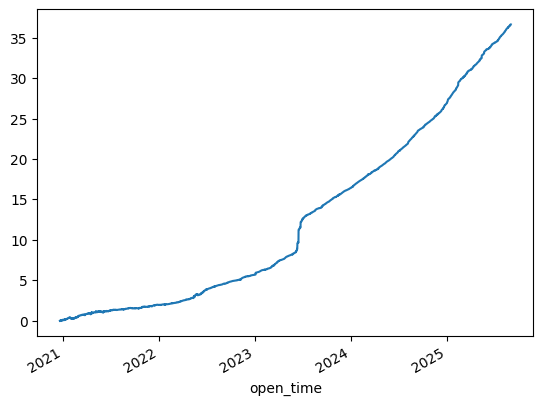

In [186]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

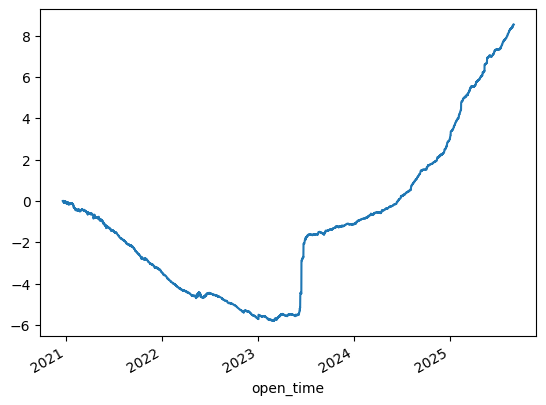

In [187]:
net_returns.cumsum().plot()

In [188]:
pd.Series(get_strategy_stats(net_returns, 4, px))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


avg returns                 1.818046
volatility                  0.903771
sharpe ratio                2.011622
max drawdown             -641.090906
max drawdown duration    1274.166667
alpha_BTC                   0.000793
beta_BTC                    0.163364
dtype: float64

### Winsorize Top And Bottom 10%

In [189]:
winsorized_signal = get_winsorized_signal(transformed_signal, 0.10, 0.10)
gross_returns, net_returns = get_gross_returns_and_net_returns(winsorized_signal, px)

<Axes: xlabel='open_time'>

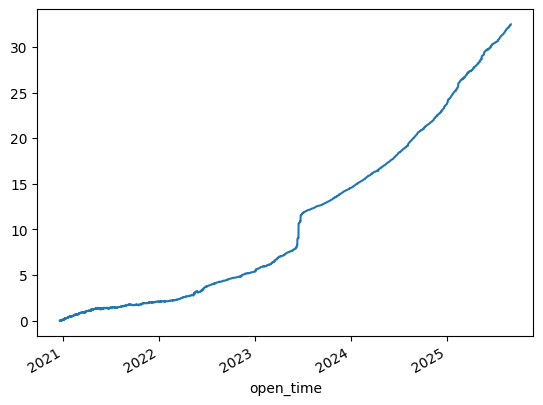

In [190]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

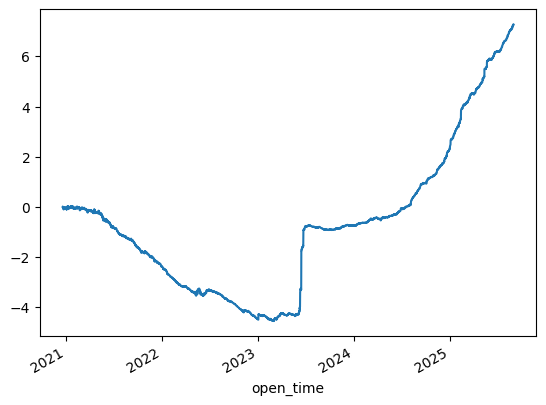

In [191]:
net_returns.cumsum().plot()

In [192]:
pd.Series(get_strategy_stats(net_returns, 4, px))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


avg returns                 1.546494
volatility                  0.905297
sharpe ratio                1.708272
max drawdown             -152.742206
max drawdown duration    1274.833333
alpha_BTC                   0.000643
beta_BTC                    0.271977
dtype: float64

### Winsorize Top And Bottom 20%

In [193]:
winsorized_signal = get_winsorized_signal(transformed_signal, 0.20, 0.20)
gross_returns, net_returns = get_gross_returns_and_net_returns(winsorized_signal, px)

<Axes: xlabel='open_time'>

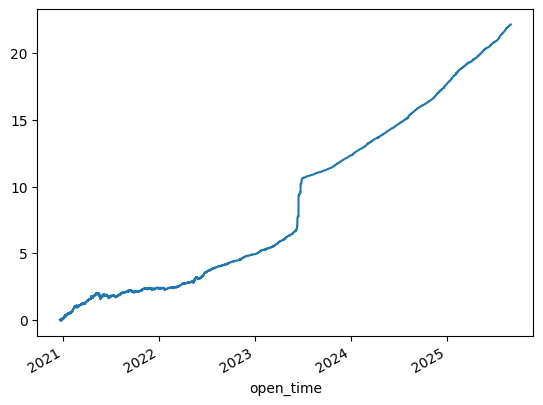

In [194]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

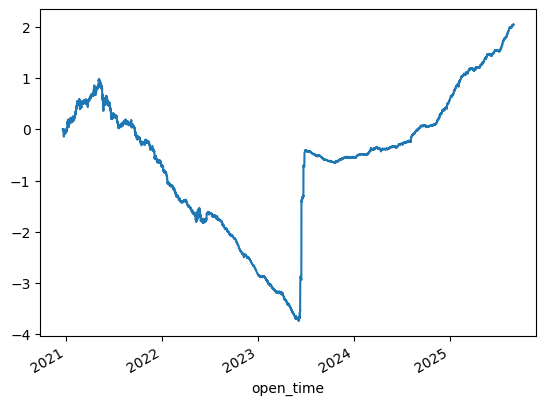

In [195]:
net_returns.cumsum().plot()

In [196]:
pd.Series(get_strategy_stats(net_returns, 4, px))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1054/1496792138.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


avg returns                 0.435252
volatility                  0.896885
sharpe ratio                0.485293
max drawdown              -15.344705
max drawdown duration    1375.000000
alpha_BTC                   0.000098
beta_BTC                    0.434048
dtype: float64

# Strategy 18: Basic Correlation Strategy, One Period Behind

In [ ]:
ret = px / px.shift() - 1
one_behind_ret = ret.shift()

provided_corr = one_behind_ret.corrwith(ret['BTCUSDT'])

In [28]:
provided_corr.sort_values()

TUSDUSDT    -0.043537
NEOUSDT     -0.039886
ETCUSDT     -0.038350
BTCUSDT     -0.036196
WAVESUSDT   -0.032501
               ...   
AVAXUSDT     0.015597
LSKUSDT      0.016148
GRTUSDT      0.019953
ANTUSDT      0.032721
USTUSDT      0.071501
Length: 73, dtype: float64

In [ ]:
provided_corr = one_behind_ret.corrwith(ret['ETHUSDT'])

In [32]:
provided_corr.sort_values()

TUSDUSDT    -0.072429
WAVESUSDT   -0.046289
HNTUSDT     -0.040133
BTCUSDT     -0.038380
TRXUSDT     -0.038369
               ...   
LSKUSDT      0.019018
GRTUSDT      0.019291
ANTUSDT      0.025453
BUSDUSDT     0.027098
USTUSDT      0.069580
Length: 73, dtype: float64

In [ ]:
extreme_value_indices = ret.columns
crypto_to_highest_lookback_return = 

for column in ret.columns:
    provided_corr = one_behind_ret.corrwith(ret[column])
    sorted_corr = provided_corr.sort_values()
    crypto_to_highest_lookback_return[column] = {
        "min": (sorted_corr.index[0], sorted_corr.iloc[0]),
        "max": (sorted_corr.index[-1], sorted_corr.iloc[-1])
    }

In [48]:
val_min_row = None
min_of_mins = float('inf')
min_witness = None

val_max_row = None
max_of_maxs = float('-inf')
max_witness = None

for row, data in crypto_to_highest_lookback_return.items():
    if data['min'][1] < min_of_mins:
        val_min_row = row
        min_witness = data['min'][0]
        min_of_mins = data['min'][1]
    if data['max'][1] > max_of_maxs:
        val_max_row = row
        max_witness = data['max'][0]
        max_of_maxs = data['max'][1]

print(val_min_row)
print(min_witness, min_of_mins)
print(val_max_row)
print(max_witness, max_of_maxs)

USDCUSDT
USDCUSDT -0.2933173164450143
USDCUSDT
BUSDUSDT 0.20828177932471795


In [25]:
# one_behind_ret.std()
# ret['BTCUSDT'].std()

unscaled_prods = (one_behind_ret - one_behind_ret.mean()).multiply(ret['BTCUSDT'] - ret['BTCUSDT'].mean(), axis=0)
cov = unscaled_prods.sum() / one_behind_ret.shape[0]

cov / (one_behind_ret.std() * ret['BTCUSDT'].std())

BTCUSDT   -0.036186
ETHUSDT   -0.028035
ADAUSDT   -0.009193
BNBUSDT   -0.025554
XRPUSDT   -0.001073
             ...   
OXTUSDT   -0.011289
CRVUSDT    0.008445
HNTUSDT   -0.015444
BALUSDT   -0.002358
CHZUSDT   -0.000956
Length: 73, dtype: float64